In [2]:
# Importing Modules
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import seaborn as sns
import ast 
from matplotlib import ticker as mtick

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['month_name']=df['job_posted_date'].dt.month_name()
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)



In [3]:
# ONLY FOR US MARKET 
df_US = df[df['job_country']=='United States'].dropna(subset=['salary_year_avg'])
df_US.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,month_name
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}",February
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr...",July
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro...",October


In [4]:
top_jobs = df_US['job_title_short'].value_counts(ascending=False).head(6).index.tolist()
top_jobs

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [5]:
df_US_top6 = df_US[df_US['job_title_short'].isin(top_jobs)]  # Gives Us dataFrame with Top Jobs Only

In [6]:
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index


(0.0, 600000.0)

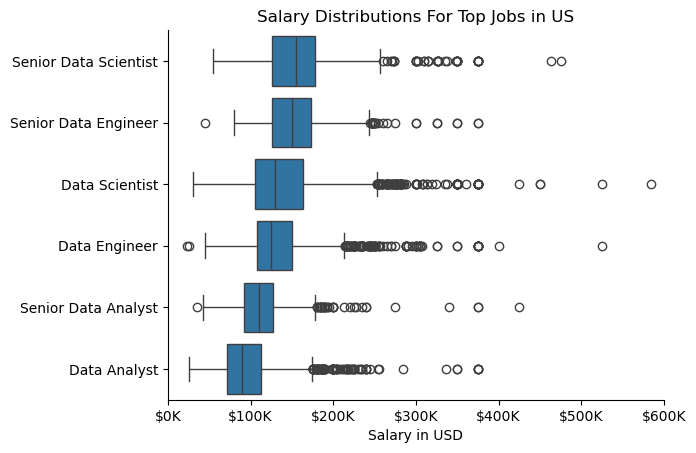

In [7]:
sns.boxplot(data=df_US_top6, y='job_title_short', x='salary_year_avg' , order=job_order)
plt.title('Salary Distributions For Top Jobs in US')
plt.xlabel('Salary in USD')
plt.ylabel('')

ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x,_:f'${int(x/1000)}K'))
sns.despine()
plt.xlim(0,600000)

**Investigate Median Salary VS Skills in Data Analyst**

In [8]:
df_da_us = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

In [26]:
df_exploded= df_da_us.explode('job_skills')

In [27]:
df_final = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills', 'count'),
    median_salary = ('salary_year_avg','median')
)

In [33]:
df_top_skills = df_final.sort_values(by='skill_count', ascending=False).head(7).reset_index()
df_top_skills


,job_skills,skill_count,median_salary
0,sql,34452,91000.0
1,excel,27519,84392.0
2,tableau,19311,92875.0
3,python,18382,97500.0
4,sas,13200,90000.0
5,r,11659,92500.0
6,power bi,11630,90000.0


In [ ]:
top_skills = df_top_skills['job_skills'].tolist()


['sql', 'excel', 'tableau', 'python', 'sas', 'r', 'power bi']

In [35]:
df_highest_pay_skills = df_final.sort_values(by='median_salary', ascending=False).head(7).reset_index()
df_highest_pay_skills

,job_skills,skill_count,median_salary
0,dplyr,13,196250.0
1,bitbucket,97,189000.0
2,gitlab,96,186000.0
3,solidity,11,179000.0
4,hugging face,2,175000.0
5,couchbase,11,160515.0
6,ansible,48,159640.0


<Axes: ylabel='job_skills'>

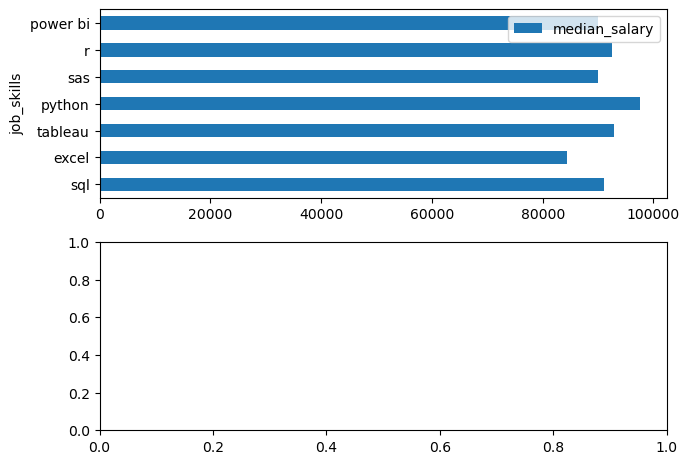

In [42]:
fig , ax = plt.subplots(2,1)
# sns.boxplot(data=df_highest_pay_skills , x='median_salary',y='job_skills', hue='median_salary', palette='dark:r_r',ax=ax[0])
# sns.boxplot(data=df_top_skills , x='median_salary',y='job_skills', hue='median_salary', palette='dark:r_r',ax=ax[1])
fig.tight_layout()
df_top_skills.plot(kind='barh' , x='job_skills', y='median_salary' ,ax=ax[0])